# Taller 1: Data Science

## Importación de librerías

In [1]:
#%pip install - -upgrade pandas-profiling

In [2]:
#%pip install markupsafe == 2.0.1

In [3]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

%matplotlib inline


## Entendimiento de los datos

### Diccionario de datos

<img src="./assets/image1.png" alt="Diccionario de datos"/>

### Revisión de los datos

<img src="./assets/image2.png" alt="Diccionario de datos" />

## Requerimiento del negocio

Una vez que ya se entendieron los datos se procede a dar respuesta a las siguientes preguntas del negocio:
1. Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.
2. ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?
3. ¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.
4. Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019? 
5. ¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.
6. Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?
7. Compare los géneros Pop y Rock según sus características de: energy, valence y tempo.Concluya sobre su análisis.
8. Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

### 1. Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.

#### Limpieza de los datos

##### Primer reto: formato de los datos

El primer reto que enfrenté para leer éste archivo fue leer la última comlumna de género, ya que ésta podía contener uno o más géneros separados por comas. Para solucionarlo, lo que hice fue abrir el archivo en excel y cambiar los delimitantes del csv comas a punto y comas. 

Durante este proceso me di cuenta de que existía un dato con más valores que las columnas descritas, por lo cual procedí a eliminarlo.

Otra cosa que hice, fue eliminar 22 observaciones que tenían como valor en la columna de género: "set()".

Después de esto, ya pude abrir el archivo correctamente.

In [4]:
df = pd.read_csv('Data_Taller_1.csv', sep=';')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,1.77e-05,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.0,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.0,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,1.35e-05,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.00104,0.0845,0.879,172.656,pop


##### Segundo reto: Verificar valores nulos

In [5]:
df.isnull().sum()


artist              0
song                0
duration_ms         3
explicit            2
year                1
popularity          4
danceability        4
energy              1
key                 1
loudness            2
mode                1
speechiness         2
acousticness        4
instrumentalness    2
liveness            1
valence             2
tempo               3
genre               2
dtype: int64

Como los valores son pocos, procedí a eliminar estos datos

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()


artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

##### Tercer reto: más de un valor en una columna

El segundo reto fue que en la columna de género todavía podía existir más de un valor, por lo cual, decidí hacer una transformación one hot encoding para que cada género estuviera en una columna independiente.

In [8]:
df2 = pd.concat([df, df.genre.str.split(', ', expand=True)], axis=1)
df2.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,genre,0,1,2,3
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,...,0.3000,1.77e-05,0.355,0.894,95.053,pop,pop,None,None,None
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,...,0.0103,0.0,0.612,0.684,148.726,"rock, pop",rock,pop,None,None
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,...,0.1730,0.0,0.251,0.278,136.859,"pop, country",pop,country,None,None
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,...,0.0263,1.35e-05,0.347,0.544,119.992,"rock, metal",rock,metal,None,None
5,Sisqo,Thong Song,253733.0,True,1999.0,69.0,0.706,0.888,2.0,-6.959,...,0.1190,9.64e-05,0.070,0.714,121.549,"hip hop, pop, R&B",hip hop,pop,R&B,None


In [9]:
genreList = ['pop',
             'rock',
             'hip hop',
             'Dance/Electronic',
             'metal',
             'R & B',
             'R&B',
             'Folk/Acoustic',
             'World/Traditional',
             'latin',
             'country',
             'easy listening',
             None,
             'R&B',
             'blues',
             'classical',
             'jazz']
print(genreList)


['pop', 'rock', 'hip hop', 'Dance/Electronic', 'metal', 'R & B', 'R&B', 'Folk/Acoustic', 'World/Traditional', 'latin', 'country', 'easy listening', None, 'R&B', 'blues', 'classical', 'jazz']


In [10]:
#df2['pop'] = np.where(df2[0]== 'pop', 1,np.where(df2[1]== 'pop', 1,np.where(df2[2]== 'pop', 1,np.where(df2[3]== 'pop', 1,0))))

In [11]:
for genre in genreList:
    df2[genre] = np.where(df2[0]== genre, 1,np.where(df2[1]== genre, 1,np.where(df2[2]== genre, 1,np.where(df2[3]== genre, 1,0))))

In [12]:
df2.iloc[:,-21:]

,genre,0,1,2,3,pop,rock,hip hop,Dance/Electronic,metal,...,R&B,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz
0,pop,pop,None,None,None,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"rock, pop",rock,pop,None,None,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"pop, country",pop,country,None,None,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"rock, metal",rock,metal,None,None,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,"hip hop, pop, R&B",hip hop,pop,R&B,None,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,hip hop,hip hop,None,None,None,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,pop,pop,None,None,None,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,pop,pop,None,None,None,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1975,pop,pop,None,None,None,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df2.iloc[:, 17:22]


,genre,0,1,2,3
0,pop,pop,None,None,None
1,"rock, pop",rock,pop,None,None
2,"pop, country",pop,country,None,None
3,"rock, metal",rock,metal,None,None
5,"hip hop, pop, R&B",hip hop,pop,R&B,None
...,...,...,...,...,...
1971,hip hop,hip hop,None,None,None
1972,pop,pop,None,None,None
1973,pop,pop,None,None,None
1975,pop,pop,None,None,None


In [14]:
df3 = df2.drop(df2.iloc[:, 17:22], axis=1)

df3.iloc[:, 15:]


,valence,tempo,pop,rock,hip hop,Dance/Electronic,metal,R & B,R&B,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz
0,0.894,95.053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.684,148.726,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.278,136.859,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.544,119.992,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0.714,121.549,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0.175,150.231,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1972,0.952,137.958,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1973,0.564,169.994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1975,0.347,102.998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Cuarto reto: Dos columnas con el mismo nombre

El tercer reto es que las columnas R&B y R & B son equivalentes, por lo cual procedí a unficarlas.

In [15]:
df3['R&B1'] = np.where(df3['R & B'] == 1, 1, np.where(df3['R&B'] == 1, 1, 0))

#Drop columns r & B and R&B
df4 = df3.drop(['R & B', 'R&B'], axis=1)

#rename column R&B1 to R&B
df4.rename(columns={'R&B1': 'R&B'}, inplace=True)

df4.iloc[:, 15:]


,valence,tempo,pop,rock,hip hop,Dance/Electronic,metal,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
0,0.894,95.053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.684,148.726,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.278,136.859,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.544,119.992,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0.714,121.549,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0.175,150.231,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1972,0.952,137.958,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1973,0.564,169.994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1975,0.347,102.998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df4.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,...,0,0,0,0,0,0,0,0,0,0
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,...,0,0,0,1,0,0,0,0,0,0
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,...,0,0,0,0,0,0,0,0,0,0
5,Sisqo,Thong Song,253733.0,True,1999.0,69.0,0.706,0.888,2.0,-6.959,...,0,0,0,0,0,0,0,0,0,1


##### Quinto reto: eliminar valores repetidos

In [17]:
df4 = df4.drop_duplicates()

### 2. ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

In [18]:
df5 = df4.groupby(['artist', 'year']).count().reset_index()

df5.head(10)

,artist,year,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,...,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
0,*NSYNC,2000.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,*NSYNC,2001.0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,112,2001.0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2 Chainz,2013.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2 Chainz,2017.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,21 Savage,2017.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,21 Savage,2018.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,2Pac,2001.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,2Pac,2004.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,3 Doors Down,2000.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Nota: como el mayor periodo del dataset es 2020 se toman los años posteriores al 2010

In [19]:
#order by year descending
df6 = df5.sort_values(by=['year'], ascending=False)

#show only year bigger than 2010
df7 = df6[df6['year'] > 2010]

df7.head(10)

,artist,year,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,...,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
1354,t.A.T.u.,2020.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
904,NSG,2020.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1317,Will Smith,2020.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1081,Sam Feldt,2019.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
664,Kehlani,2019.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
629,Juice WRLD,2019.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
77,Anuel AA,2019.0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
641,K-Ci & JoJo,2019.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1036,Regard,2019.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
73,Angie Martinez,2019.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [20]:
#order by artist
df8 = df7.sort_values(by=['artist'], ascending=True)

df8.head(10)


,artist,year,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,...,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
3,2 Chainz,2013.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2 Chainz,2017.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,21 Savage,2017.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,21 Savage,2018.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12,3 Doors Down,2012.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17,5 Seconds of Summer,2018.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16,5 Seconds of Summer,2014.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
18,5 Seconds of Summer,2019.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
22,6ix9ine,2018.0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
23,99 Souls,2016.0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
result = df8['artist'].value_counts()

result.sort_values(ascending=False).head(10)



Calvin Harris    7
Drake            7
Avicii           7
David Guetta     6
Chris Brown      6
Taylor Swift     5
Ariana Grande    5
Lana Del Rey     5
Ed Sheeran       4
Selena Gomez     4
Name: artist, dtype: int64

### 3. ¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.

In [22]:
# average duration_ms by folk/acoustic in seconds
folk_avg=df4[df4['Folk/Acoustic'] == 1]['duration_ms'].mean()/1000

#average duration_ms by Latin in seconds
latin_avg=df4[df4['latin'] == 1]['duration_ms'].mean()/1000

print('Average duration in sec by Folk/Acoustic: ',
      round(folk_avg, 2), 'seconds')
print('Average duration in sec by Latin: ', round(latin_avg,2), 'seconds')

# difference between average duration_ms by latin and folk/acoustic
diff = latin_avg - folk_avg
#truncate diff to 2 decimals
diff = round(diff, 2)

print('Difference between average duration in seconds by Folk/Acoustic and Latin: ', diff, 'seconds')


Average duration in min by Folk/Acoustic:  220.18 seconds
Average duration in min by Latin:  226.58 seconds
Difference between average duration in seconds by Folk/Acoustic and Latin:  6.4 seconds


### 4. Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019? 

In [23]:
pd.set_option('display.max_columns', None)


In [24]:
# count by genre grouped by year
df10=df4.groupby(['year']).sum().reset_index()

df10.head()


,year,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,pop,rock,hip hop,Dance/Electronic,metal,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
0,1998.0,215466.0,49.0,0.727,0.4450,1.0,-11.241,1.0,0.2910,0.339000,0.1800,0.5270,81.125,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1999.0,9133324.0,2339.0,24.132,26.8140,186.0,-212.564,20.0,2.4752,4.594162,5.8508,20.7263,4466.076,28,8,7,3,3,1,0,3,1,1,0,1,0,0,7
2,2000.0,17340875.0,4069.0,47.847,51.4940,354.0,-427.340,38.0,5.4452,7.954799,12.4965,44.5630,7646.082,53,12,19,4,7,3,1,2,0,0,0,0,0,0,24
3,2001.0,25744381.0,6291.0,71.518,77.1771,552.0,-621.686,55.0,11.3721,14.989458,18.4972,69.8344,12445.977,90,16,32,12,8,1,0,3,3,0,0,0,0,0,35
4,2002.0,21190781.0,5214.0,56.641,60.8700,483.0,-454.349,42.0,10.4100,11.507705,16.1246,48.5740,9482.143,69,13,43,3,5,2,0,0,0,1,0,0,0,0,30


In [42]:
# count by genre grouped by year 2019.  top 5
top5_genres_2019=df4[df4['year'] == 2019].iloc[:, 17:].sum().sort_values(ascending=False).head(5)
top5_genres_2019


pop                 62
hip hop             35
Dance/Electronic    20
R&B                  9
latin                8
dtype: int64

In [26]:
# delete R & B from genreList
genreList.remove('R & B')

In [27]:
# show only years 2000 2005 2010 2015 2019 
df12=df10[df10['year'].isin([2000, 2005, 2010, 2015, 2019])]

<AxesSubplot:title={'center':'Count by genre grouped by year'}, xlabel='year'>

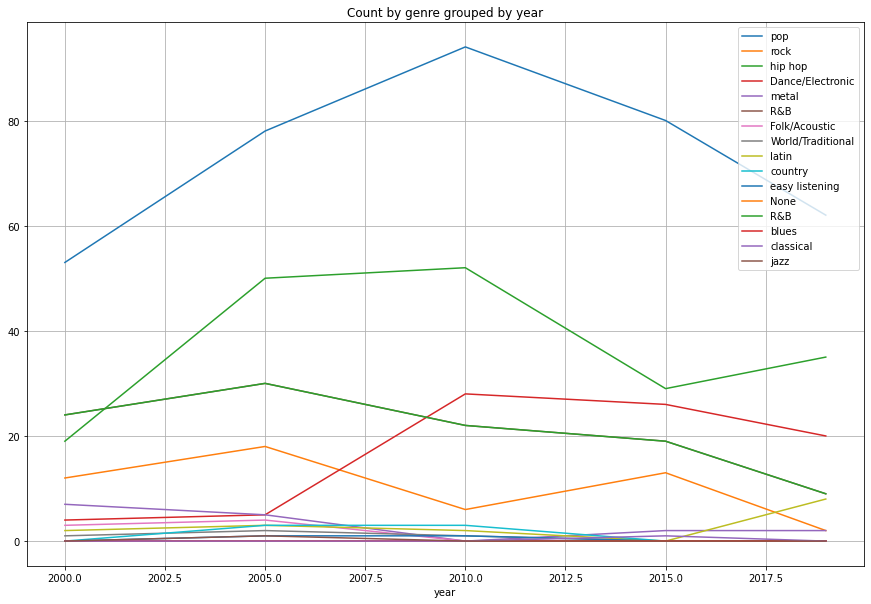

In [28]:
#line graph df10 year vs genre. only graph years 2000 2005 2010 2015 2019 
df12.plot(x='year', y=genreList, kind='line', figsize=(15, 10), grid=True, title='Count by genre grouped by year')

### 5. ¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

In [29]:
#get first year of each artist
df13=df4.groupby(['artist']).min().reset_index()
df14=df13.groupby(['year']).count().reset_index()

df14

,year,artist,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hip hop,Dance/Electronic,metal,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
0,1998.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1999.0,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2,2000.0,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
3,2001.0,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
4,2002.0,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
5,2003.0,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
6,2004.0,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
7,2005.0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
8,2006.0,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
9,2007.0,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35


<AxesSubplot:title={'center':'First year of each artist'}, xlabel='year'>

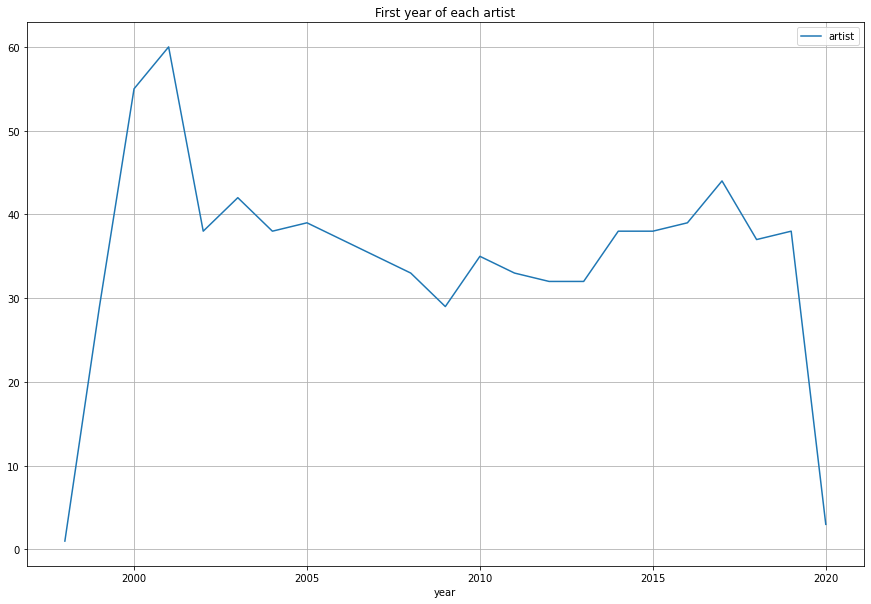

In [30]:
#line graph first year of each artist
df14.plot(x='year', y='artist', kind='line', figsize=(15, 10), grid=True, title='First year of each artist')

### 6. Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

In [31]:
# order by year
df15=df4.sort_values(by=['year'], ascending=True)
df15.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hip hop,Dance/Electronic,metal,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
44,Missy Elliott,Hot Boyz,215466.0,True,1998.0,49.0,0.727,0.445,1.0,-11.241,1.0,0.2910,0.33900,0.0,0.1800,0.5270,81.125,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
24,Melanie C,I Turn To You,352173.0,False,1999.0,54.0,0.522,0.803,1.0,-5.825,1.0,0.0327,0.00117,0.00167,0.3100,0.0783,135.205,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
132,Dido,Thank You,218360.0,False,1999.0,73.0,0.725,0.583,1.0,-9.942,0.0,0.0427,0.30000,0.000238,0.0665,0.7620,79.984,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57,Donell Jones,"U Know What's Up (feat. Lisa ""Left Eye"" Lopes)",243733.0,True,1999.0,63.0,0.854,0.543,8.0,-6.166,0.0,0.0844,0.04020,5.73e-05,0.0419,0.8680,103.032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
30,DMX,Party Up,268866.0,True,1999.0,71.0,0.510,0.931,11.0,-3.302,1.0,0.3470,0.07380,0.0,0.5000,0.5300,201.936,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:

# average popularity by year
df16 = df15.groupby(['year']).mean().reset_index()
#remove yeaar 1998
df17 = df16[df16['year'] > 1998]

df17.head()


,year,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,pop,rock,hip hop,Dance/Electronic,metal,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
1,1999.0,253703.444444,64.972222,0.670333,0.744833,5.166667,-5.904556,0.555556,0.068756,0.127616,0.162522,0.575731,124.057667,0.777778,0.222222,0.194444,0.083333,0.083333,0.027778,0.000000,0.083333,0.027778,0.027778,0.0,0.027778,0.0,0.000000,0.194444
2,2000.0,251317.028986,58.971014,0.693435,0.746290,5.130435,-6.193333,0.550725,0.078916,0.115287,0.181109,0.645841,110.812783,0.768116,0.173913,0.275362,0.057971,0.101449,0.043478,0.014493,0.028986,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.347826
3,2001.0,242871.518868,59.349057,0.674698,0.728086,5.207547,-5.864962,0.518868,0.107284,0.141410,0.174502,0.658815,117.414877,0.849057,0.150943,0.301887,0.113208,0.075472,0.009434,0.000000,0.028302,0.028302,0.000000,0.0,0.000000,0.0,0.000000,0.330189
4,2002.0,252271.202381,62.071429,0.674298,0.724643,5.750000,-5.408917,0.500000,0.123929,0.136996,0.191960,0.578262,112.882655,0.821429,0.154762,0.511905,0.035714,0.059524,0.023810,0.000000,0.000000,0.000000,0.011905,0.0,0.000000,0.0,0.000000,0.357143
5,2003.0,236625.439560,58.758242,0.666033,0.706473,5.285714,-5.811681,0.571429,0.119910,0.180971,0.164974,0.613751,119.410374,0.802198,0.142857,0.351648,0.109890,0.131868,0.000000,0.010989,0.021978,0.000000,0.010989,0.0,0.010989,0.0,0.010989,0.351648


<AxesSubplot:title={'center':'Average popularity by year'}, xlabel='year'>

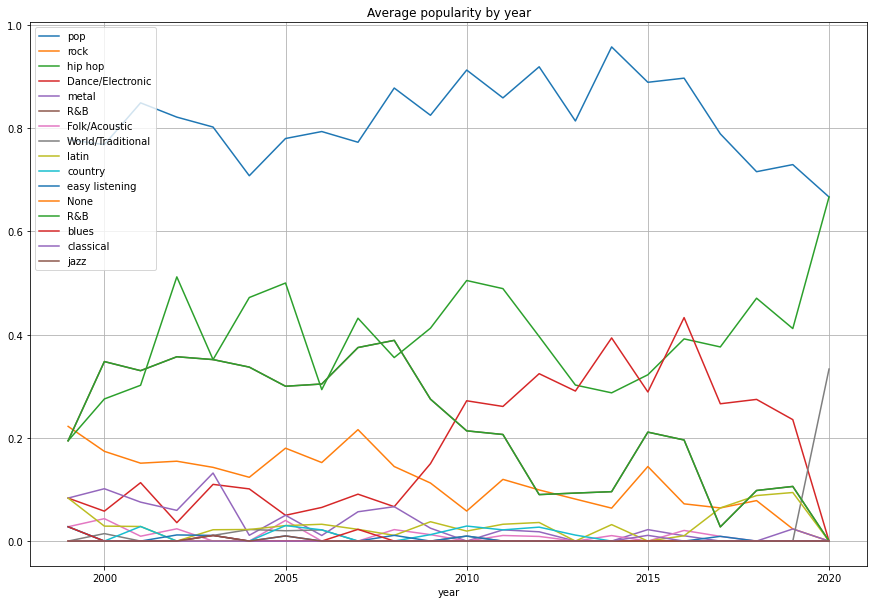

In [33]:
# dot chart genrelist average popularity by year

df17.plot(x='year', y=genreList, kind='line', figsize=(15, 10), grid=True, title='Average popularity by year')

##### Conclusiones

* Se concluye que el Pop ha sido el género más popular en el periodo de 1999 al 2020.
* En los últimos años, el hip hop ha tomado una tendencia positiva a tal punto de que en el último año igualó al género Pop. Y parece que en los futuros años va a ocupar el primer lugar en popuularidad.
* Se determina que desde el 2019, el género World/Traditional, ha crecido en popularidad rápidamente. Es posible que se vuelva tendencia en el próximo año.
* En el último año, se evidencia que varios generos como Dance/Electronic, R&B, Rock, entre otros, no tienen popularidad, pero esto puede ser causado porque aún no se han registrado las canciones de estos géneros.


### 7. Compare los géneros Pop y Rock según sus características de: energy, valence y tempo.Concluya sobre su análisis.

In [34]:
df16 =  df4[['energy', 'valence', 'tempo', 'pop', 'rock']].copy()
df16

,energy,valence,tempo,pop,rock
0,0.834,0.894,95.053,1,0
1,0.897,0.684,148.726,1,1
2,0.496,0.278,136.859,1,0
3,0.913,0.544,119.992,0,1
5,0.888,0.714,121.549,1,0
...,...,...,...,...,...
1971,0.653,0.175,150.231,0,0
1972,0.734,0.952,137.958,1,0
1973,0.702,0.564,169.994,1,0
1975,0.520,0.347,102.998,1,0


##### Promedio Tempo Energy Valence

In [35]:
#exclude cases where pop and rock are 0
df17 = df16[(df16['pop'] == 1) | (df16['rock'] == 1)]

# Average Tempo by Pop and Rock.
df18 = df17.groupby(['pop', 'rock']).mean().reset_index()

df18.head()

,pop,rock,energy,valence,tempo
0,0,1,0.825204,0.523111,127.213602
1,1,0,0.711504,0.555438,119.282389
2,1,1,0.761934,0.531687,125.255430


##### Conclusiones

Energy: 
* El género rock tiene un valor de energy 11% mayor que pop
* Cuando la cancion pertenece a ambos géneros, la energy toma un valor 6% menor que una cancion de rock y 5% más que una cancion de pop

Valence: 
* El género pop, en promedio es 3% más positivo que el género Rock.
* Cuando la canción pertenece a ambos géneros, la canción es casi igual de positiva que cación de rock y tiene 3% menos positivad que una canción de pop

Tempo:
* Por lo general, las canciones de rock tienen un tempo de 127 mientras que el pop tiene un tempo de 119. 

#### Moda de tempo

##### Graficas: 
* Energy - Pop Rock
* Tempo - Pop Rock
* Valence - Pop Rock


<AxesSubplot:title={'center':'Average enery, valence and temppo vs Pop Rock'}, xlabel='rock'>

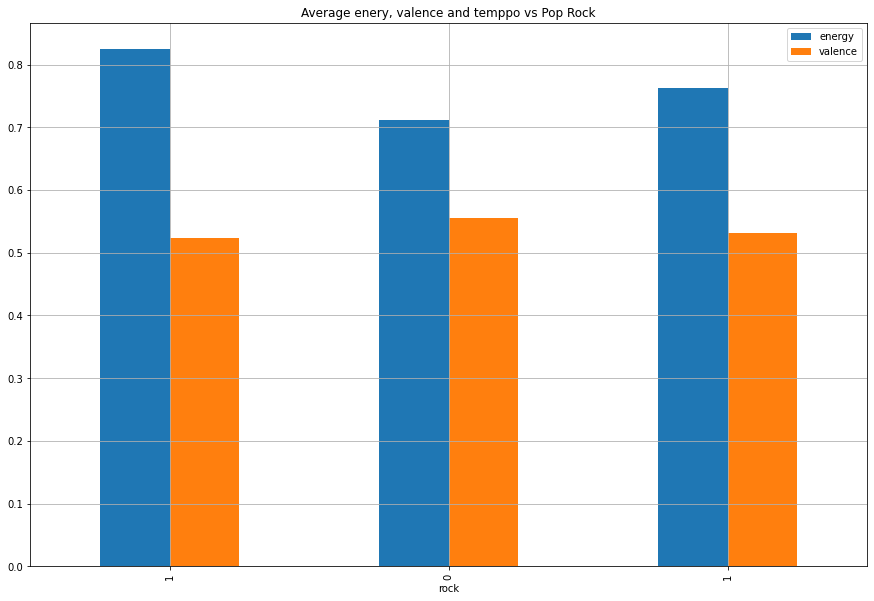

In [36]:
# Graph average enery, valence vs Pop Rock
df18.plot(x='rock', y=['energy', 'valence'], kind='bar', figsize=(15, 10), grid=True, title='Average enery, valence and temppo vs Pop Rock') 



<AxesSubplot:title={'center':'Average tempo vs Pop Rock'}, xlabel='pop'>

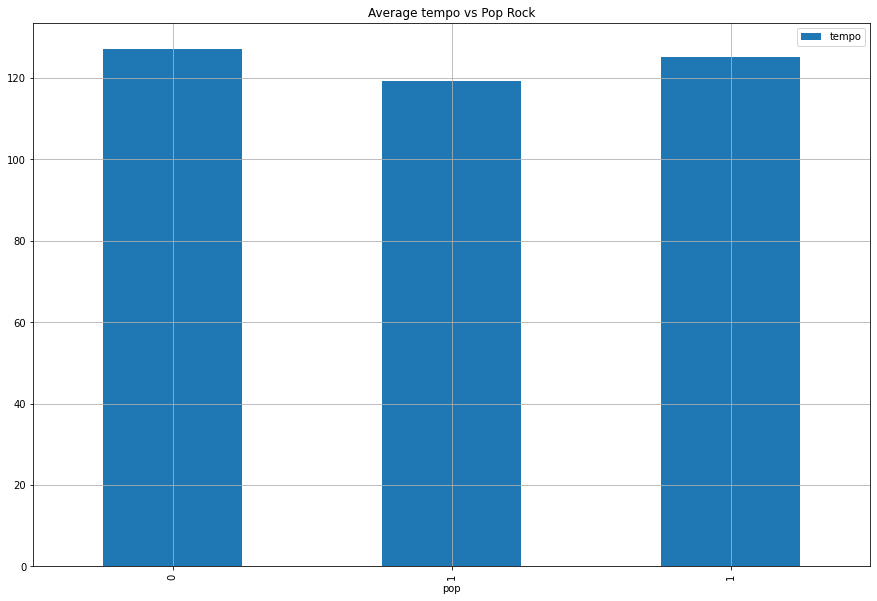

In [37]:
# Graph average tempo vs Pop Rock
df18.plot(x='pop', y='tempo', kind='bar', figsize=(15, 10), grid=True, title='Average tempo vs Pop Rock')


### 8. Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

##### ¿Cuáles son las top 5 canciones acusticas(con certeza mayor al 50%) e instrumentales(mayor al 50%) más populares?


In [38]:
df4.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hip hop,Dance/Electronic,metal,Folk/Acoustic,World/Traditional,latin,country,easy listening,None,blues,classical,jazz,R&B
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,1.77e-05,0.355,0.894,95.053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.0,0.612,0.684,148.726,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.0,0.251,0.278,136.859,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,1.35e-05,0.347,0.544,119.992,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Sisqo,Thong Song,253733.0,True,1999.0,69.0,0.706,0.888,2.0,-6.959,1.0,0.0654,0.1190,9.64e-05,0.070,0.714,121.549,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
# top 5 most popular songs where acousticness is higher than 0.5
df19 = df4[df4['acousticness'] > 0.5].sort_values(by=['popularity'], ascending=False).head(5)
df19 = df19[['song', 'artist','popularity', 'acousticness']]
df19

,song,artist,popularity,acousticness
1296,Another Love,Tom Odell,88.0,0.695
1799,lovely (with Khalid),Billie Eilish,86.0,0.934
1681,Shape of You,Ed Sheeran,84.0,0.581
1693,Bored,Billie Eilish,84.0,0.896
1391,All of Me,John Legend,84.0,0.922


#### Conclusiones

* La canción acustica más popular es Another Love de Tom Odell
* La canción del top 5, con más certeza de ser acústica es Lovely (with Khalid) de	Billie Eilish
* La quinta canción más popular en promedio es All of Me de John Legend